## Sentiment analysis with TextBlob

We want to know if the quotes have a positive or a negative intention. In the following section a sentiment analysis approach was done with TextBlob. TextBlob is a python library for Natural Language Processing (NLP).It uses Natural Language ToolKit (NLTK) to achieve its tasks. It can be used for complex analysis on textual data.

In [42]:
import pandas as pd
from textblob import TextBlob

### get the citations as dataframe:


In [43]:
# example data frame, must be replaced by dataframe of citations for one topic (filtering)
list = ['This is a good example', 'This is a bad example', 'I dont like it', 'I love it', 'What is it?', 'These immigrants are good', 'These immigrants destroy everything']
df = pd.DataFrame(list, columns=['quotation'])

### Define the functions for subjectivity and polarity

In [44]:
def getSubjectivity(citation):
    """
    Get the Subjectivity of a quote
    :param citation: String with the quote to be analyzed
    :return: Subjectivity of the quote
    """
    return TextBlob(citation).sentiment.subjectivity

def getPolarity(citation):
    """
    Get the polarity of a quote
    :param  citation: String with the quote to be analyzed
    :return: Float Polarity of the quote in range of [-1,1]
    """
    return TextBlob(citation).sentiment.polarity

def analysis(score):
    """
    Analyzises the score
    :param score: Float with the score 
    :return: String either Positive, Negative or Neutral
    """
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'


In [45]:
# add to DataFrame
df['Polarity'] = df['quotation'].apply(getPolarity)
df['Analysis'] = df['Polarity'].apply(analysis)
df.head() 

,quotation,Polarity,Analysis
0,This is a good example,0.7,Positive
1,This is a bad example,-0.7,Negative
2,I dont like it,0.0,Neutral
3,I love it,0.5,Positive
4,What is it?,0.0,Neutral


In [46]:
# count pos, neg and neutral citations
tb_counts = df.Analysis.value_counts()
print(tb_counts)

Positive    3
Negative    2
Neutral     2
Name: Analysis, dtype: int64


### Visualize the results

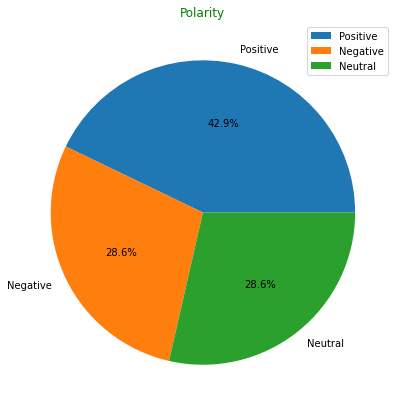

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.title("Polarity", color = 'g')
plt.pie(tb_counts.values, labels = tb_counts.index,  autopct='%1.1f%%')
plt.legend()
plt.show()

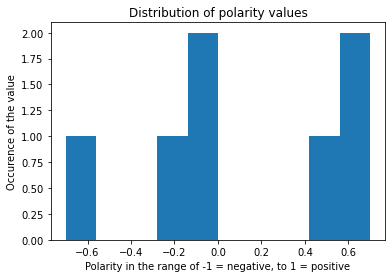

In [48]:
plt.title('Distribution of polarity values')
plt.hist(df['Polarity'])
plt.xlabel('Polarity in the range of -1 = negative, to 1 = positive')
plt.ylabel('Occurence of the value')
plt.show()